In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
sns.set_style("darkgrid")

In [2]:
data = pd.read_csv("Data/CompanyX_EU3.csv")

In [3]:
data.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


In [4]:
data.shape

(662, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


#### All the attributes are of type series objects that is string

### DATA CLEANING

In [6]:
# removing dollar symbol 
data['Funding'] = data['Funding'].str.slice(start = 1)

In [7]:
data.head(3)

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating


In [8]:
#covnerting Funds into thousands
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

In [9]:
data['Funding'] = data['Funding'].apply(value_to_float)

In [10]:
#converting funds into millons 

data['Funding'] = data['Funding']*0.001

In [11]:
data.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,630.0,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,1000.0,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


In [12]:
print("mean = " ,data['Funding'].mean())
print("median = ",data['Funding'].median())
print("mode = ",data['Funding'].mode())

mean =  17182.374776785717
median =  2250.0
mode =  0    1000.0
dtype: float64


In [13]:
#FIlling Null values with median value of funding
data['Funding'].fillna(data['Funding'].median(),inplace = True)


In [14]:
data.head(50)

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,2250.0,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,630.0,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,2250.0,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,1000.0,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,2250.0,Disrupt NYC 2013,Contestant,Operating
5,5to1,5to1.com,19300.0,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,29000.0,Disrupt Beijing 2011,Finalist,Operating
7,8020 Media,8020media.com,2250.0,TC40 2007,Contestant,Operating
8,About Last Night,aboutlastnight.net,2250.0,Disrupt NYC 2012,Contestant,Operating
9,Adgregate Markets,adgregate.com,2250.0,TC50 2008,Contestant,Operating


In [15]:
data.isnull().sum()

Startup           0
Product           6
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64

In [16]:
for item in range(len(data['Product'])):
    if type(data.Product[item]) == float:
        data.loc[item,'Product'] = data.loc[item,'Startup'].lower().replace(" ", "")+".com" 

257
imo.com
286
keenkong.com
318
localheroinc..com
359
motherknows.com
445
rainbow.com
565
telloapplications.com


In [18]:
data.isnull().sum()

Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64

In [193]:
def Check_for_Missing_other(x):
    
    count_s = 0
    count_e = 0
    count_r = 0
    count_0 = 0
    count_p = 0

    for i in range(data.shape[0]):
        if type(x)!=str:
            print("Enter String type")
            return
        if x in data.loc[i,'Startup'] and (len(data.loc[i,'Startup'])<1) and (type(data.loc[i,'Startup']) != float):
            count_s = count_s+1 
        if x in data.loc[i,'Event'] and (len(data.loc[i,'Event'])<1) and (type(data.loc[i,'Event']) != float):
            count_e = count_e+1
        if x in data.loc[i,'Result'] and (len(data.loc[i,'Result'])<1) and (type(data.loc[i,'Result']) != float):
            count_r = count_r+1
        if x in data.loc[i,'OperatingState'] and (len(data.loc[i,'OperatingState'])<1) and (type(data.loc[i,'OperatingState']) != float):
            count_o = count_o+1
        if x in data.loc[i,'Product'] and (len(data.loc[i,'Product'])<1) and (type(data.loc[i,'Product']) != float):
            count_p = count_p+1
            
    print(x,"  value count in Startup =", count_s)
    print(x,"  value count in Product =", count_p)
    print(x,"  value count in Event =", count_e)
    print(x,"  value count in Result =", count_r)
    print(x,"  value count in OperatingState =",count_0)


In [194]:
Check_for_Missing_other('-')

-   value count in Startup = 0
-   value count in Product = 0
-   value count in Event = 0
-   value count in Result = 0
-   value count in OperatingState = 0


In [195]:
#Replacing - with most repeated value in event

for x in range(len(data['Event'])):
    if '-' in data.loc[x,'Event']:
        data.loc[x,'Event'] = data['Event'].mode()[0]

In [19]:
data.describe()

,Funding
count,662.00
mean,12355.29
std,74573.84
min,5.00
25%,1200.00
50%,2250.00
75%,4375.00
max,1700000.00


In [127]:
data['Funding'].min()

5.0

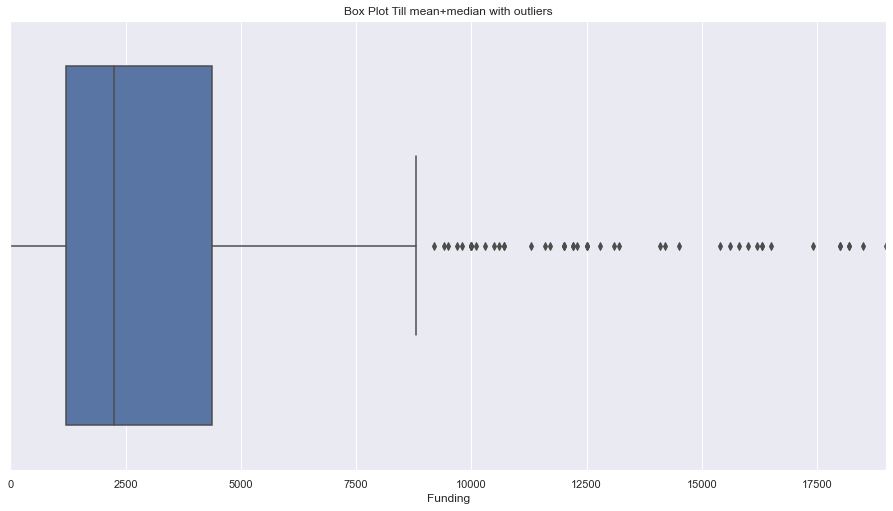

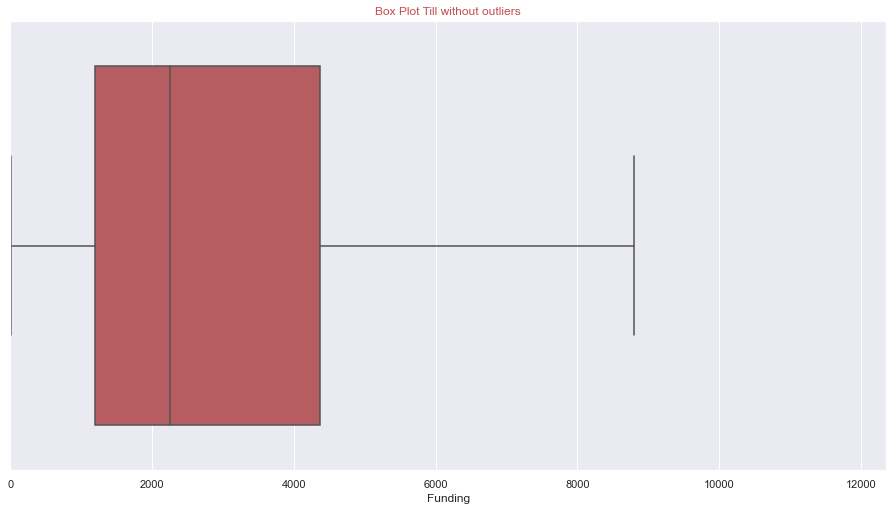

In [191]:
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.boxplot( x = data['Funding'], showfliers=True)
plt.title('Box Plot Till mean+median with outliers')
plt.xlim(-1,19000)
plt.show()
sns.boxplot( x = data['Funding'], showfliers=False,color = 'r')
plt.title('Box Plot Till without outliers',color ='r')
plt.xlim(-1,12355.29)
plt.show()

In [21]:
df = pd.DataFrame(data['Funding'])
df.max()
#df.index[df['Funding'] == df.max()]

Funding    1700000.0
dtype: float64

In [22]:
data.loc[154,'Funding']

1700000.0

 - value count in Startup = 0
 - value count in Product = 0
 - value count in Event = 0
 - value count in Result = 0
 - value count in OperatingState = 0


<b>NOTE :</b> Clearly we can see replacing nan with mean is not a good idea so replaced it with median

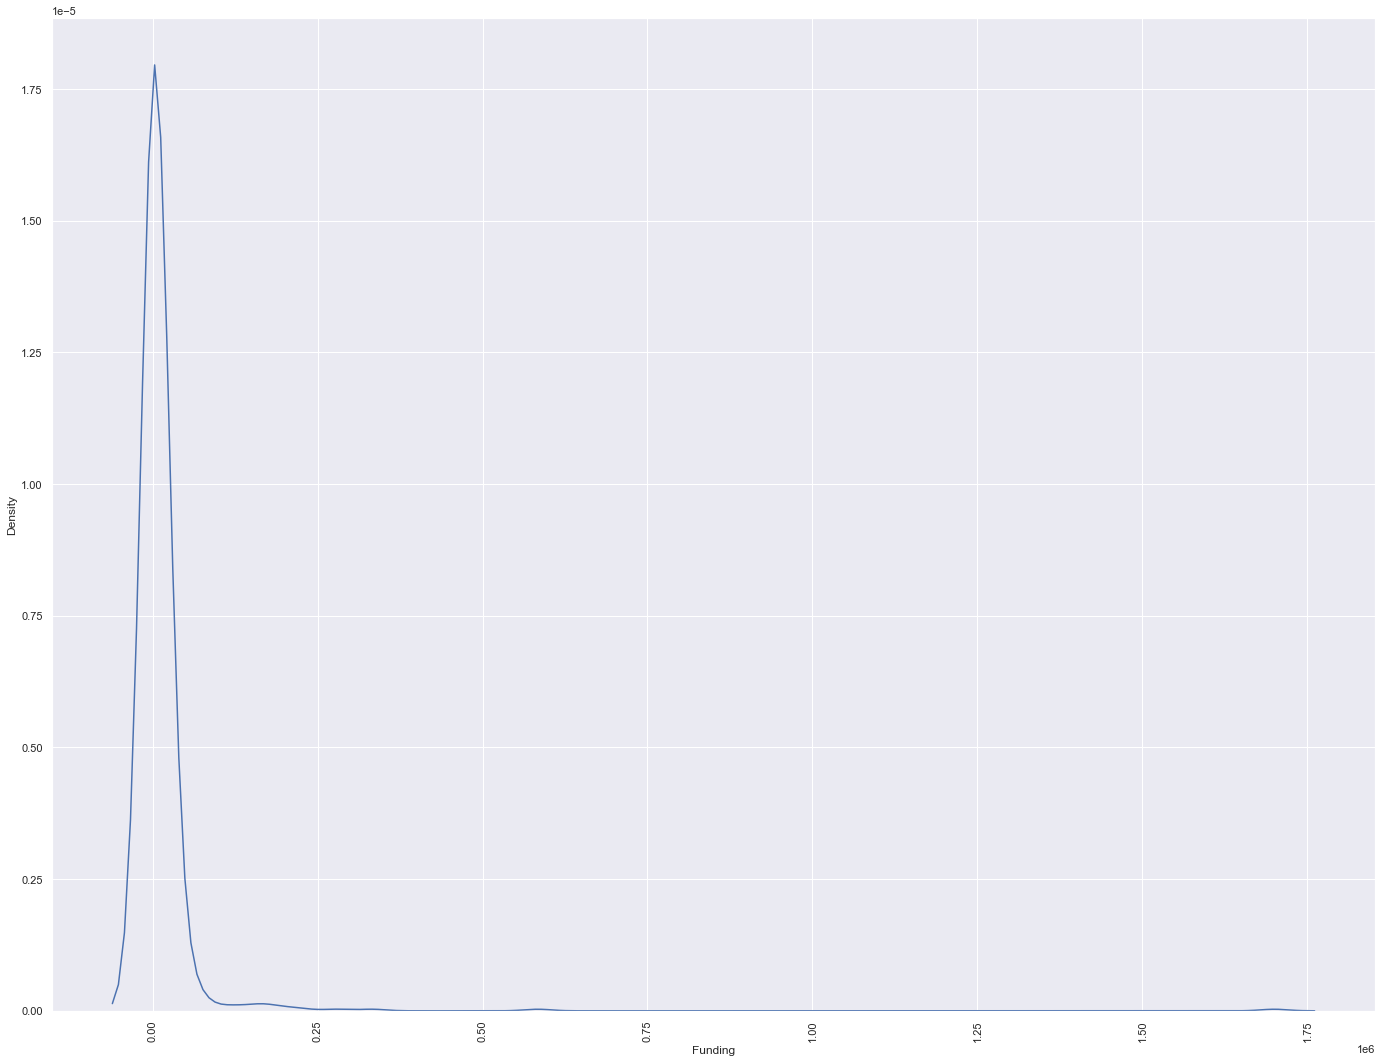

In [24]:
sns.set(rc={'figure.figsize':(23.7,18.27)})
sns.kdeplot(x = data['Funding'])
plt.xticks(rotation = 90)
#plt.axis([0,0,0.00,1.00])
plt.show()

In [25]:
z = stats.zscore(data['Funding'])
(z>2.5).sum()

6

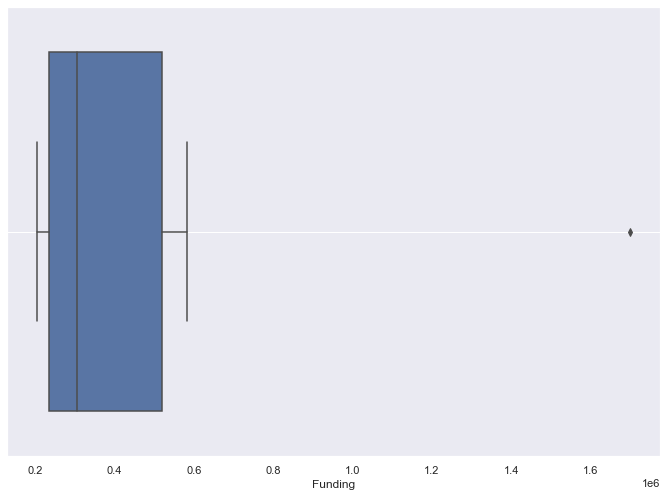

In [156]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot( x = data[z>2.5]['Funding'])
#plt.axis([data['Funding'].min()-1,data['Funding'].max()+1,0,-0])
plt.grid()
plt.show()

In [196]:
#After Removing outlier in funding
Q1,Q3 = data['Funding'].quantile([0.25,0.75])
IQR = Q3-Q1

Min_threshold = (Q1-1.5*IQR)
Max_threshold = (Q3+1.5*IQR)
print(Min_threshold," ",Max_threshold )

-3562.5   9137.5


In [197]:
#Check number of outliers greater than upper fence
filt1 = data['Funding']<Min_threshold
print("number of outlier below lower IQR whisker = ",data[filt1]['Funding'].shape[0])
filt2 = data['Funding']>Max_threshold
print("number of outlier below Upper IQR whisker = ",data[filt2]['Funding'].shape[0])

number of outlier below lower IQR whisker =  0
number of outlier below Upper IQR whisker =  114


In [198]:
filt3 = (data['Funding']>=Min_threshold) & (data['Funding']<=Max_threshold)
x=data[filt3]['Funding']
x.shape

(548,)

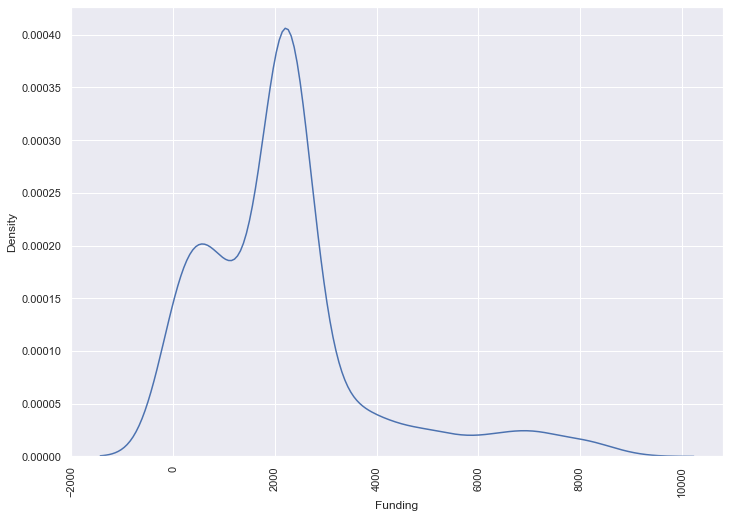

In [31]:
#• Plot a distribution plot for Funds in million.  After removing outliers simply dropping that row
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.kdeplot(x = x)
plt.xticks(rotation = 90)
#plt.axis([0,0,0.00,1.00])
plt.show()

In [209]:
# Select only the Event that has disrupt keyword from 2013 onwards

def Events(x,n):
    ps = pd.Series([],dtype = 'object')
    for x in data['Event']:
        if (type(x) == float) or (type(x) == int):
            continue
        
        if(int(x[-4:]) >= 2013):
            ps[n] = x
            n = n+1
    return ps
    

In [212]:
n = 0
ps = Events(data['Event'],n)
ps   

0          Disrupt SF 2013
1         Disrupt NYC 2013
2          Disrupt SF 2016
3          Disrupt NY 2016
4         Disrupt NYC 2013
              ...         
313    Disrupt London 2015
314    Disrupt London 2015
315        Disrupt EU 2014
316       Disrupt NYC 2013
317        Disrupt SF 2013
Length: 318, dtype: object

In [37]:
data['OperatingState'].value_counts()

Operating    465
Closed       106
Acquired      86
Ipo            5
Name: OperatingState, dtype: int64

</h4><b>State of Startups Currently</b> </h4>
<ol> 
    <li>There are total of <b>662</b> Startups</li> 
    <ul>
        <li>In them <b>465</b> are currently operating </li>
        <li>In them <b>106</b> has been closed </li>
        <li>In them <b>86</b> has been Acquired by other Organisations</li>
        <li>In them <b>5</b> has been in IPO</li>
    </ul>
<ol>
        
    

<h2> Hypthesis Testing

In [38]:
#hypothesis testing
#• Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?
#Write the null hypothesis and alternative hypothesis.
#Test for significance and conclusion

#null =  there is significant difference
#alternate = there no significant difference

from statsmodels.stats.weightstats import ztest
 
sample1 = data.loc[data.OperatingState == 'Operating','Funding']
sample2 = data.loc[data.OperatingState == 'Closed','Funding']

stats,p_val = ztest(sample1,sample2)
round_p=round(p_val,2)

if round_p<0.05:
    print("There is there is significant difference and we reject null hypothesis")
else:
        print("There is there no significant difference and we failed to reject null hypothesis")


There is there no significant difference and we failed to reject null hypothesis


In [39]:
#Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:
# Write the null hypothesis and alternative hypothesis.
# Test for significance and conclusion

#h0 =  proportion of companies are equal
#ha = proportion of companies are not equal

from statsmodels.stats.proportion import proportions_ztest

winners = data.loc[data.Result == 'Winner','OperatingState'].value_counts()[0]
contestants = data.loc[data.Result == 'Contestant','OperatingState'].value_counts()[0]

n_win = data.Result.value_counts()[3]
n_con = data.Result.value_counts()[0]

stats,p_val = proportions_ztest([winners,contestants],[n_win,n_con])
r_pval = round(p_val,2)


if r_pval<0.05:
    print('proportion of companies are equal reject null hypothesis')
else:
    print('proportion of companies are not equal fail to reject null hypothesis')

proportion of companies are not equal fail to reject null hypothesis


Value_counts 
 Operating    465
Closed       106
Name: OperatingState, dtype: int64


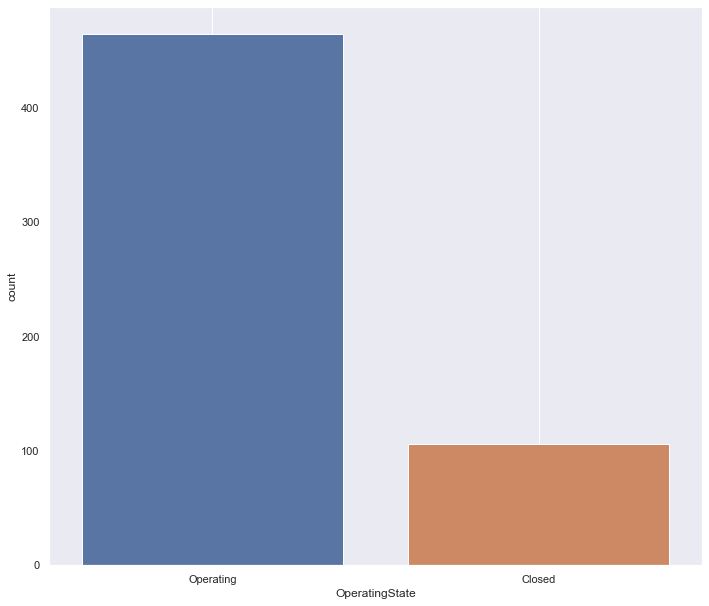

In [40]:
# Plot distribution plots for companies still operating and companies that closed.
sns.set(rc={'figure.figsize':(11.7,10.27)})
filt = (data['OperatingState'] == 'Operating') | (data['OperatingState'] == 'Closed')
new_df = data[filt]
print("Value_counts \n",new_df['OperatingState'].value_counts())
sns.countplot(x = 'OperatingState', data = new_df)
plt.grid()
plt.show()

Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: Result, dtype: int64


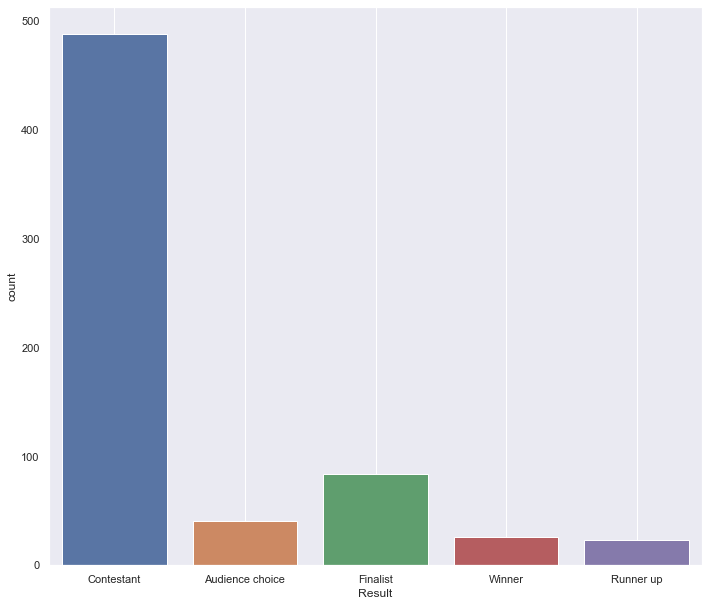

In [41]:
#• Check frequency distribution of Result variable
print(data['Result'].value_counts())
sns.countplot(x = 'Result', data = data)
plt.grid()
plt.show()

TC50 2008                    65
TC50 2009                    50
TC40 2007                    40
Disrupt NYC 2011             32
Disrupt SF 2013              31
Disrupt NYC 2013             31
Disrupt SF 2011              31
Disrupt NYC 2012             30
Disrupt SF 2012              30
Disrupt SF 2014              28
Disrupt NYC 2014             27
Disrupt SF 2015              27
Disrupt NY 2015              26
Disrupt SF 2016              26
Disrupt SF 2010              26
Disrupt NY 2016              22
Disrupt NYC 2010             22
Disrupt Beijing 2011         18
Disrupt EU 2013              15
Hardware Battlefield 2015    15
Disrupt EU 2014              15
Disrupt London 2015          15
Hardware Battlefield 2014    14
Disrupt London 2016          13
Hardware Battlefield 2016    13
Name: Event, dtype: int64


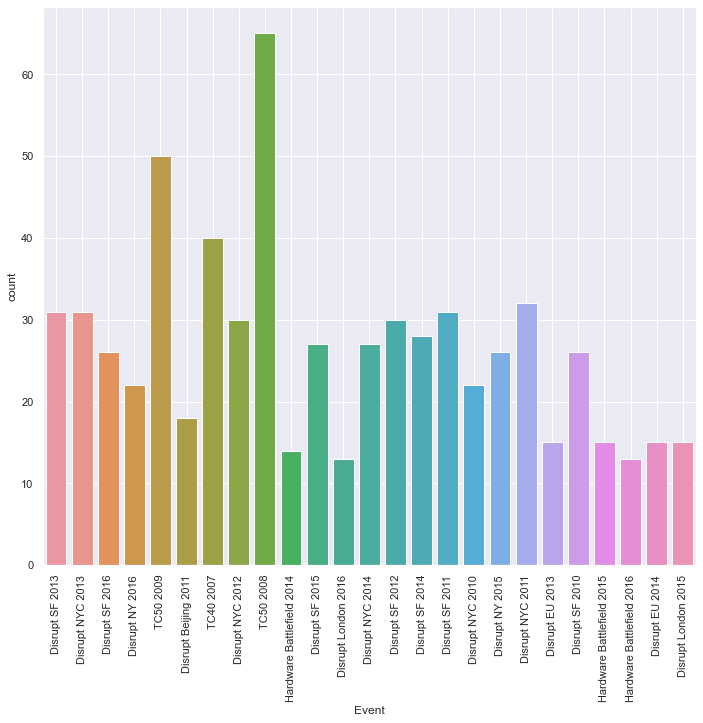

In [85]:
#• Check distribution of the Event variable.
print(data['Event'].value_counts())
sns.countplot(x = 'Event', data = data)
plt.xticks(rotation = 90)
plt.grid(axis = 'x')
plt.show()

In [104]:
#• Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from
#2013 onwards
sample = pd.DataFrame([])
sample1,sample2,sample3=pd.DataFrame([]),pd.DataFrame([]),pd.DataFrame([])
for x in ps:
    if "SF" in x:
        sample1 =pd.DataFrame({'Funding':data[data['Event'] == x]['Funding'],'EventType':'SF'}) 
       
    if 'EU' in x:
        sample2 = pd.DataFrame({'Funding':data[data['Event'] == x]['Funding'],'EventType':'EU'}) 
       
    if 'NYC' in x:
        sample3 =pd.DataFrame({'Funding':data[data['Event'] == x]['Funding'],'EventType':'NYC'}) 
        

In [108]:
sample = pd.concat([sample1,sample2,sample3],axis = 0,ignore_index=True)
sample

,Funding,EventType
0,2250.0,SF
1,2250.0,SF
2,320.0,SF
3,675.0,SF
4,2300.0,SF
...,...,...
72,2250.0,NYC
73,7800.0,NYC
74,2250.0,NYC
75,15800.0,NYC


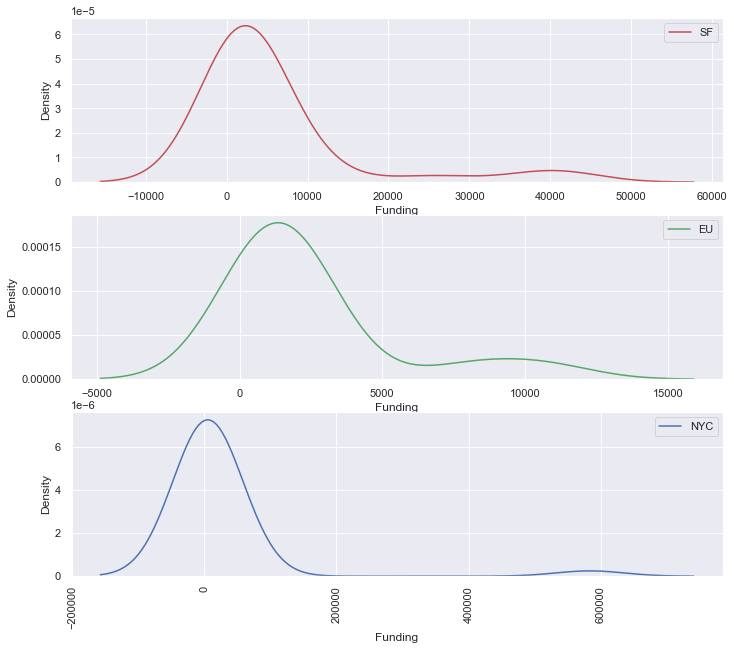

In [93]:
plt.subplot(3,1,1 )
sns.kdeplot(x = sample1['Funding'],label = 'SF',color ='r')
#plt.xticks(rotation = 90)
plt.legend()


plt.subplot(3,1,2)
sns.kdeplot(x = sample2['Funding'],label = 'EU',color ='g')
#plt.xticks(rotation = 90)
plt.legend()

plt.subplot(3,1,3)
sns.kdeplot(x = sample3['Funding'],label = 'NYC')
plt.xticks(rotation = 90)
plt.legend()


plt.show()

In [94]:
print("Sample1 mean = ",round(sample1['Funding'].mean(),2))
print("Sample2 mean = ",round(sample2['Funding'].mean(),2))
print("Sample3 mean = ",round(sample3['Funding'].mean(),2))

print('-'*15)
print("Sample1 var = ",round(sample1['Funding'].var(),2))
print("Sample2 var = ",round(sample2['Funding'].var(),2))
print("Sample3 var = ",round(sample3['Funding'].var(),2))

Sample1 mean =  5862.9
Sample2 mean =  2419.13
Sample3 mean =  24531.98
---------------
Sample1 var =  107264032.56
Sample2 var =  8919280.88
Sample3 var =  10850046577.01


In [112]:
#H0 = All means are equal m1 = m2 = m3
#Ha = atleast one mean differ

import statsmodels.api as sm
from statsmodels.formula.api import ols

lm = ols('Funding~EventType',data =sample).fit()
table = sm.stats.anova_lm(lm)  
print(table)

             df        sum_sq       mean_sq         F    PR(>F)
EventType   2.0  7.374434e+09  3.687217e+09  0.829737  0.440181
Residual   74.0  3.288442e+11  4.443840e+09       NaN       NaN


In [117]:
p_val = round(table.iloc[0,-1],2)
p_val

0.44

In [119]:
if p_val<0.05:
    print(" Reject Null Hypothesis")
else:
     print(" fail  Reject Null Hypothesis")

 fail  Reject Null Hypothesis


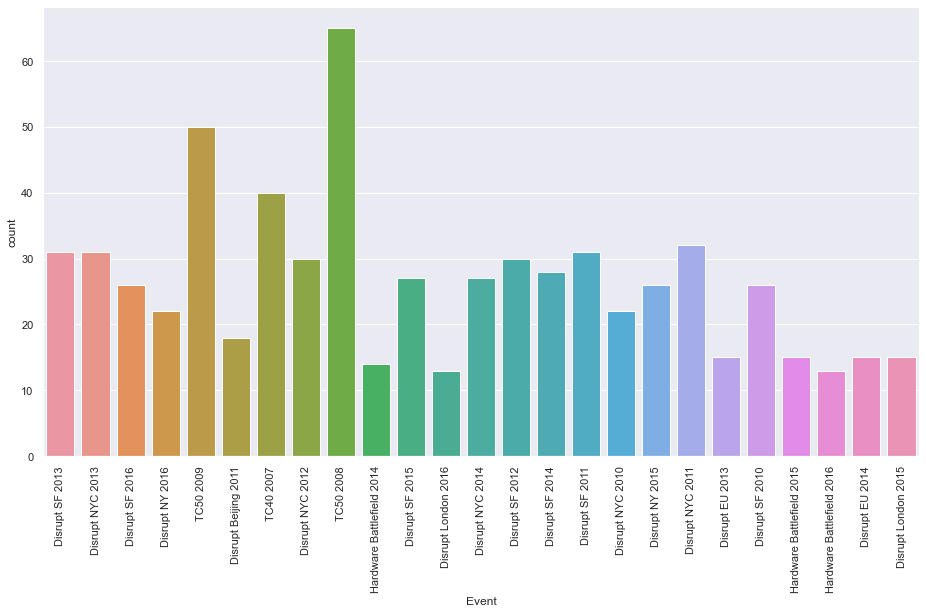

In [215]:
#• Plot the distribution plot comparing the 3 city events.
sns.countplot(x = 'Event',data = data)
plt.xticks(rotation =90)
plt.show()